In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

labels_without_a618 = ("A606", "A607", "A609", "A621")
a618_label = "A618"
first_day = datetime.strptime("2019-09-01", "%Y-%m-%d")
tamanho_janela = 10


In [3]:
frentes_frias = [
    datetime.strptime("2019-09-01", "%Y-%m-%d"),
    datetime.strptime("2019-09-02", "%Y-%m-%d"),
    datetime.strptime("2019-09-03", "%Y-%m-%d"),
    datetime.strptime("2019-09-04", "%Y-%m-%d"),
    datetime.strptime("2019-09-05", "%Y-%m-%d"),
    datetime.strptime("2019-09-13", "%Y-%m-%d"),
    datetime.strptime("2019-09-14", "%Y-%m-%d"),
    datetime.strptime("2019-09-20", "%Y-%m-%d"),
    datetime.strptime("2019-09-21", "%Y-%m-%d"),
    datetime.strptime("2019-09-22", "%Y-%m-%d"),
    datetime.strptime("2019-09-24", "%Y-%m-%d"),
    datetime.strptime("2019-10-07", "%Y-%m-%d"),
    datetime.strptime("2019-10-08", "%Y-%m-%d"),
    datetime.strptime("2019-10-09", "%Y-%m-%d"),
    datetime.strptime("2019-10-20", "%Y-%m-%d"),
    datetime.strptime("2019-11-01", "%Y-%m-%d"),
    datetime.strptime("2019-11-24", "%Y-%m-%d"),
    datetime.strptime("2019-11-27", "%Y-%m-%d"),
    datetime.strptime("2019-11-28", "%Y-%m-%d"),
    datetime.strptime("2019-11-29", "%Y-%m-%d"),
    datetime.strptime("2019-12-04", "%Y-%m-%d"),
    datetime.strptime("2019-12-05", "%Y-%m-%d"),
    datetime.strptime("2019-12-06", "%Y-%m-%d"),
    datetime.strptime("2019-12-14", "%Y-%m-%d"),
    datetime.strptime("2019-12-18", "%Y-%m-%d"),
    datetime.strptime("2019-12-22", "%Y-%m-%d"),
    datetime.strptime("2019-12-23", "%Y-%m-%d"),
    datetime.strptime("2019-12-24", "%Y-%m-%d"),
    datetime.strptime("2019-12-25", "%Y-%m-%d"),
    datetime.strptime("2020-01-02", "%Y-%m-%d"),
    datetime.strptime("2020-01-03", "%Y-%m-%d"),
    datetime.strptime("2020-01-12", "%Y-%m-%d"),
    datetime.strptime("2020-01-13", "%Y-%m-%d"),
    datetime.strptime("2020-01-17", "%Y-%m-%d"),
    datetime.strptime("2020-02-02", "%Y-%m-%d"),
    datetime.strptime("2020-02-10", "%Y-%m-%d"),
    datetime.strptime("2020-02-11", "%Y-%m-%d"),
    datetime.strptime("2020-02-21", "%Y-%m-%d"),
    datetime.strptime("2020-02-22", "%Y-%m-%d"),
    datetime.strptime("2020-02-27", "%Y-%m-%d"),
    datetime.strptime("2020-02-28", "%Y-%m-%d"),
    datetime.strptime("2020-03-17", "%Y-%m-%d"),
    datetime.strptime("2020-03-18", "%Y-%m-%d"),
    datetime.strptime("2020-03-20", "%Y-%m-%d"),
    datetime.strptime("2020-03-21", "%Y-%m-%d"),
    datetime.strptime("2020-04-03", "%Y-%m-%d"),
    datetime.strptime("2020-04-08", "%Y-%m-%d"),
    datetime.strptime("2020-05-02", "%Y-%m-%d"),
    datetime.strptime("2020-05-06", "%Y-%m-%d"),
    datetime.strptime("2020-05-07", "%Y-%m-%d"),
    datetime.strptime("2020-05-14", "%Y-%m-%d"),
    datetime.strptime("2020-05-15", "%Y-%m-%d"),
    datetime.strptime("2020-05-23", "%Y-%m-%d"),
    datetime.strptime("2020-05-24", "%Y-%m-%d"),
    datetime.strptime("2020-07-14", "%Y-%m-%d"),
    datetime.strptime("2020-07-30", "%Y-%m-%d"),
    datetime.strptime("2020-10-08", "%Y-%m-%d"),
    datetime.strptime("2020-10-09", "%Y-%m-%d"),
]

### Gráfico de temperatura média e anomalias sem a estação A618

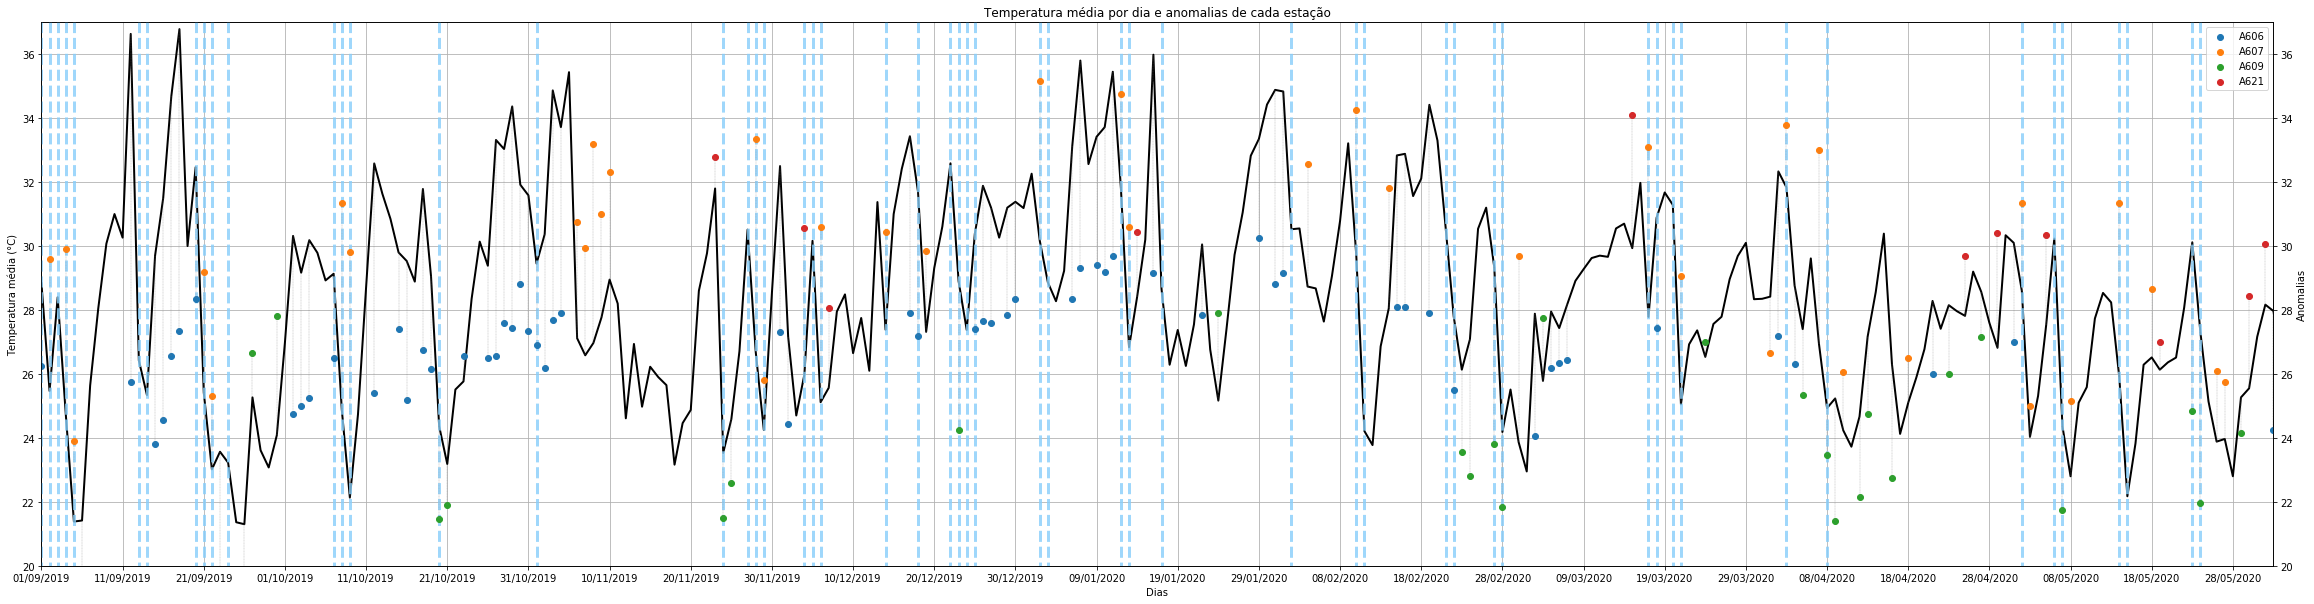

In [34]:
df_anomalias = pd.read_csv("./dados_csv/anomalia_1.csv", names=labels_without_a618)
df_media = pd.read_csv("./dados_csv/media_1.csv",names=["Medias"])
x = tuple(
    (first_day + timedelta(days=i)).strftime("%d/%m/%Y")
    for i in range(len(df_anomalias["A606"]))
)

_, media_plot = plt.subplots(figsize=(40,10))
anomalias_plot = media_plot.twinx()

for label in labels_without_a618:
    anomalias_plot.scatter(x, df_anomalias[label], label=label)

for date in frentes_frias:
    idx = date - first_day
    idx = idx.days
    #print(idx)
    plt.plot([idx, idx], [0, 50], '--', color="lightskyblue", linewidth=3, alpha=.8, zorder=-10)

media_plot.plot(df_media, 'k', linewidth=2, zorder=10)

media_plot.set_ylim(20, 37)
media_plot.set_xlim(0, 275)

media_plot.set_xlabel("Dias")
media_plot.set_ylabel("Temperatura média (°C)")
media_plot.set_title("Temperatura média por dia e anomalias de cada estação")
media_plot.set_xticks(np.arange(0, 275, 10))
media_plot.set_yticks(np.arange(20, 37, 2))

anomalias_plot.set_ylabel("Anomalias")
anomalias_plot.set_ylim(20, 37)
anomalias_plot.set_xlim(0, 275)
anomalias_plot.legend()

for idx in df_media.index:
    for label in labels_without_a618:
        if df_anomalias[label].loc[idx]:
            plt.plot([idx, idx], [df_media["Medias"].loc[idx], df_anomalias[label].loc[idx]], 'grey', linestyle='--', linewidth=.3)
        

media_plot.grid(True)
plt.xticks(rotation=45)

plt.savefig("dados_csv/exp2_temperatura_1.pdf")

### Gráfico de temperatura média e anomalias da estação A618

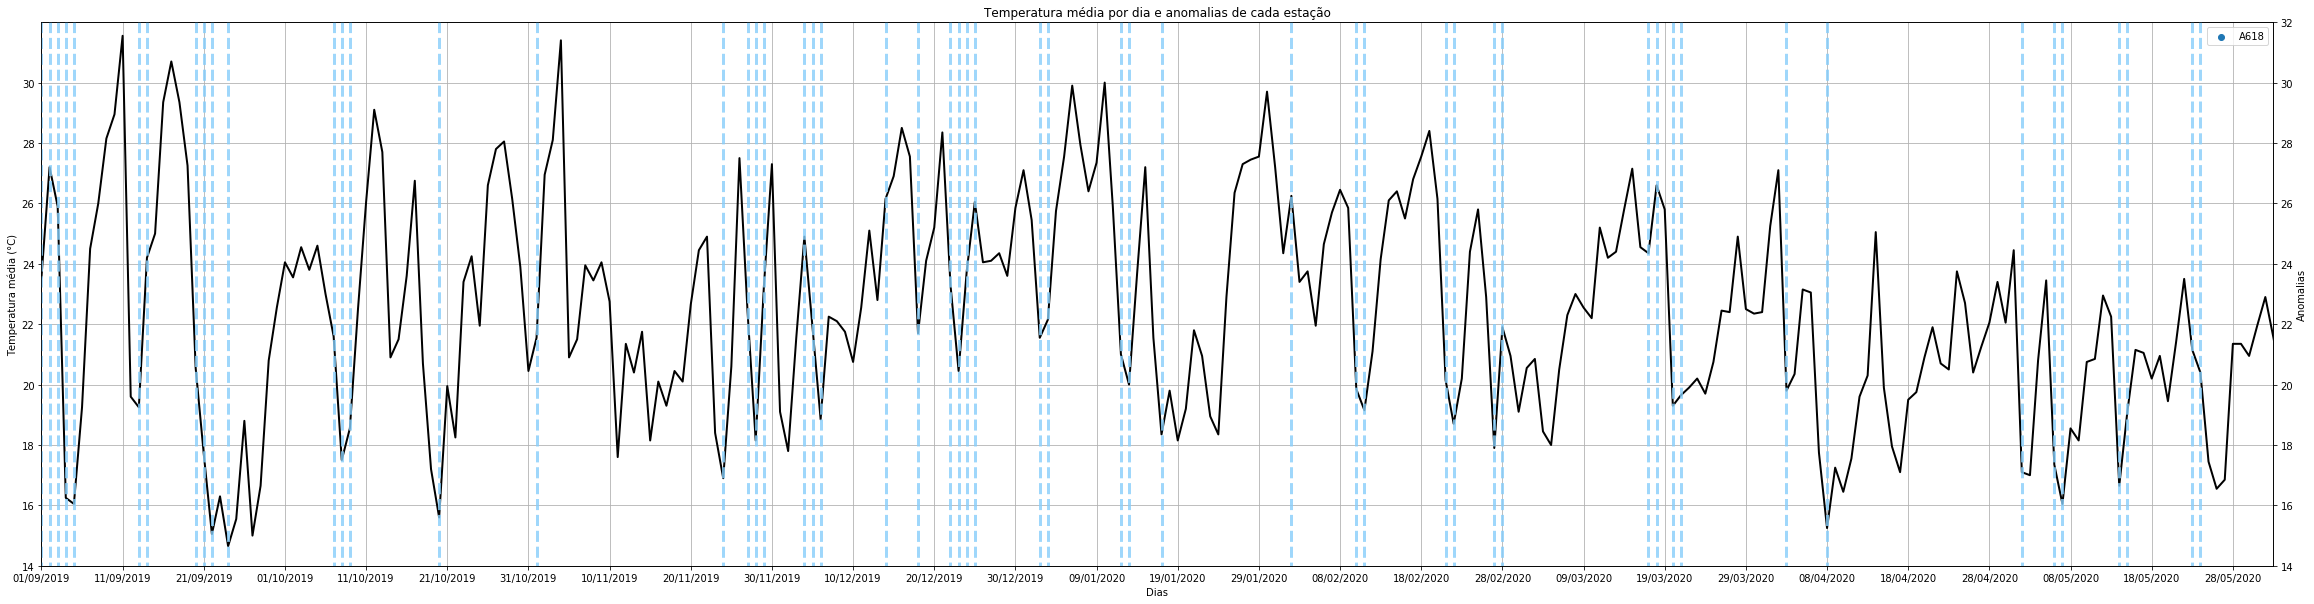

In [29]:
df_anomalias = pd.read_csv("./dados_csv/anomalia_2.csv", names=[a618_label])
df_media = pd.read_csv("./dados_csv/media_2.csv")
x = tuple(
    (first_day + timedelta(days=i)).strftime("%d/%m/%Y")
    for i in range(len(df_anomalias[a618_label]))
)

_, media_plot = plt.subplots(figsize=(40,10))
anomalias_plot = media_plot.twinx()

anomalias_plot.scatter(x, df_anomalias[a618_label], label=a618_label)

for date in frentes_frias:
    idx = date - first_day
    idx = idx.days
    #print(idx)
    plt.plot([idx, idx], [0, 50], '--', color="lightskyblue", linewidth=3, alpha=.8, zorder=-10)

media_plot.plot(df_media, 'k', linewidth=2, zorder=10)

media_plot.set_ylim(14, 32)
media_plot.set_xlim(0, 275)

media_plot.set_xlabel("Dias")
media_plot.set_ylabel("Temperatura média (°C)")
media_plot.set_title("Temperatura média por dia e anomalias de cada estação")
media_plot.set_xticks(np.arange(0, 275, 10))
media_plot.set_yticks(np.arange(14, 32, 2))

anomalias_plot.set_ylabel("Anomalias")
anomalias_plot.set_ylim(14, 32)
anomalias_plot.set_xlim(0, 275)
anomalias_plot.legend()

for idx in df_media.index:
    if df_anomalias[a618_label].loc[idx]:
        plt.plot([idx, idx], [df_media["Medias"].loc[idx], df_anomalias[a618_label].loc[idx]], 'grey', linestyle='--', linewidth=.3)


media_plot.grid(True)
plt.savefig("dados_csv/exp2_temperatura_2.pdf")

### Gráfico de crença

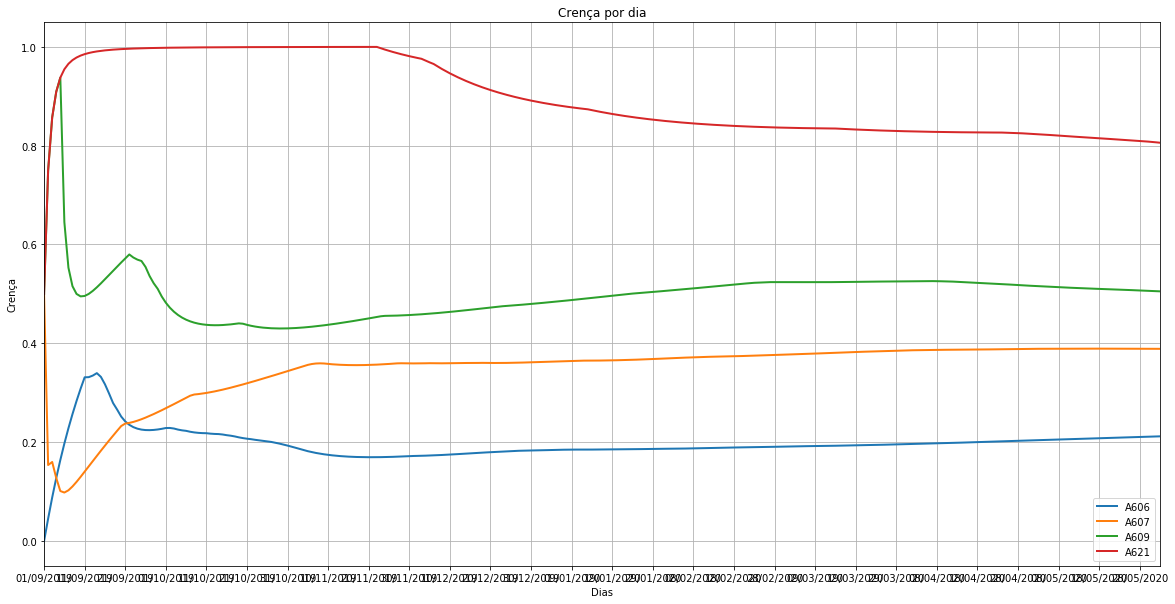

In [30]:
df = pd.read_csv("./dados_csv/crenca_1.csv", names=labels_without_a618)
x = tuple(
    (first_day + timedelta(days=i)).strftime("%d/%m/%Y")
    for i in range(len(df["A606"]))
)

_, ax = plt.subplots(figsize=(20,10))

for label in labels_without_a618:
    plt.plot(x, df[label], label=label, linewidth=2)
    
#for date in frentes_frias:
#    idx = date - first_day
#    idx = idx.days
#    #print(idx)
#    plt.plot([idx, idx], [-1, 2], '--', color="lightskyblue", linewidth=3, alpha=.5, zorder=-10)

ax.set_xlabel("Dias")
ax.set_ylabel("Crença")
ax.set_title("Crença por dia")
ax.legend(loc="lower right")
ax.grid(True)
#ax.set_ylim(-.05, 1.05)

ax.set_xlim(0, 275)
ax.set_xticks(np.arange(0, 275, 10))

plt.savefig("dados_csv/exp2_crenca_1.pdf")

### Gráfico de descrença

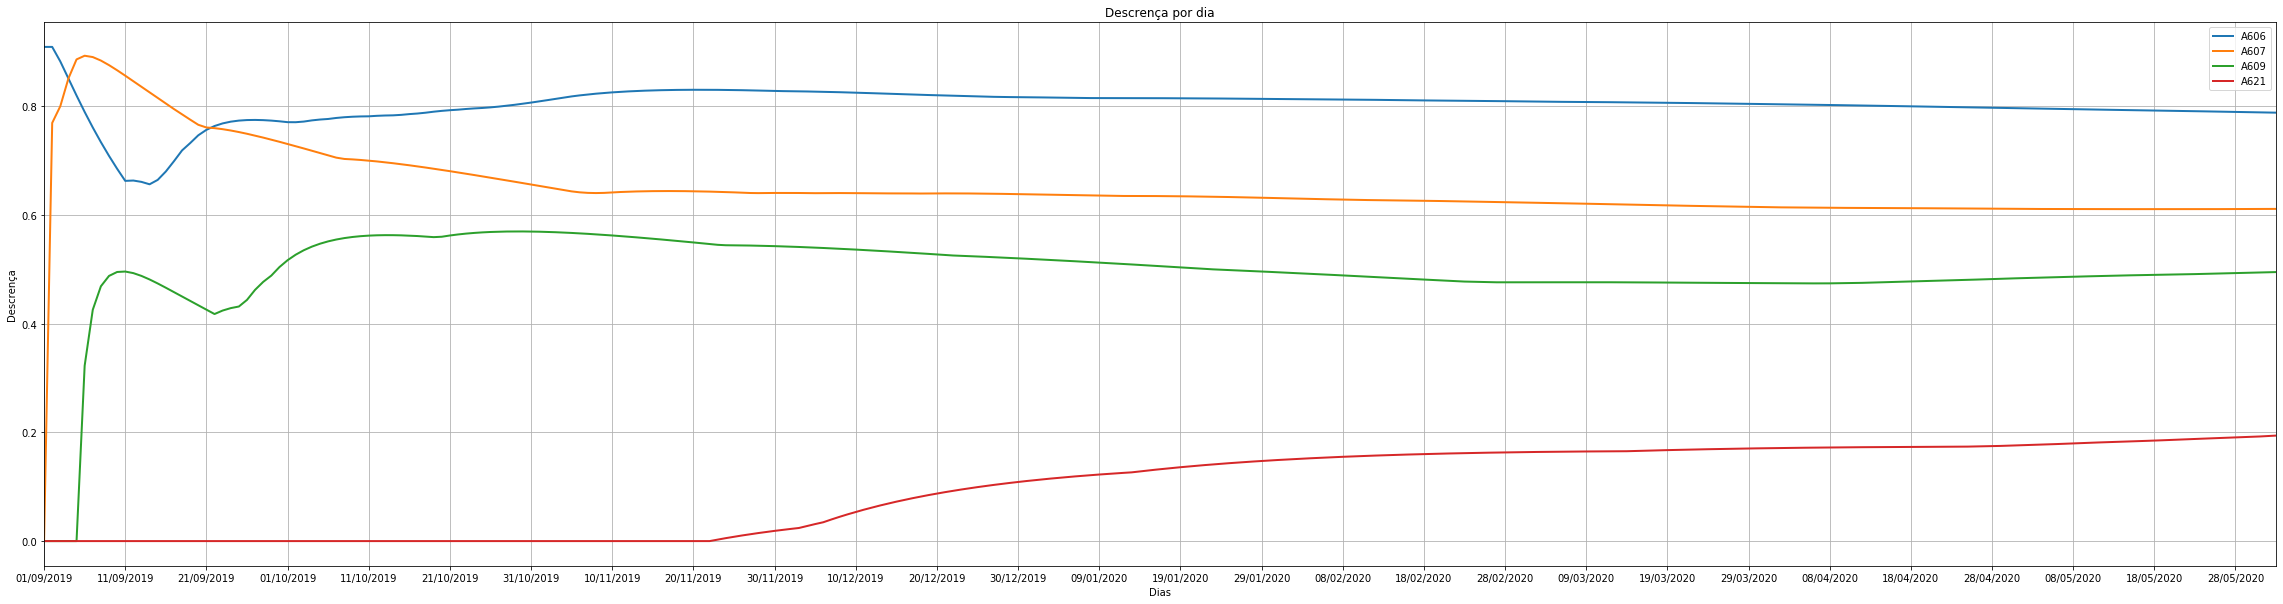

In [31]:
df = pd.read_csv("./dados_csv/descrenca_1.csv", names=labels_without_a618)
x = tuple(
    (first_day + timedelta(days=i)).strftime("%d/%m/%Y")
    for i in range(len(df["A606"]))
)

_, ax = plt.subplots(figsize=(40,10))

for label in labels_without_a618:
    plt.plot(x, df[label], label=label, linewidth=2)
    
#for date in frentes_frias:
#    idx = date - first_day
#    idx = idx.days
#    #print(idx)
#    plt.plot([idx, idx], [-1, 2], '--', color="lightskyblue", linewidth=3, alpha=.5, zorder=-10)

ax.set_xlabel("Dias")
ax.set_ylabel("Descrença")
ax.set_title("Descrença por dia")
ax.legend(loc='upper right')
ax.grid(True)

#ax.set_ylim(-.05, 1.05)

ax.set_xlim(0, 275)
ax.set_xticks(np.arange(0, 275, 10))

plt.savefig("dados_csv/exp2_descrenca_1.pdf")

### Gráfico de incerteza

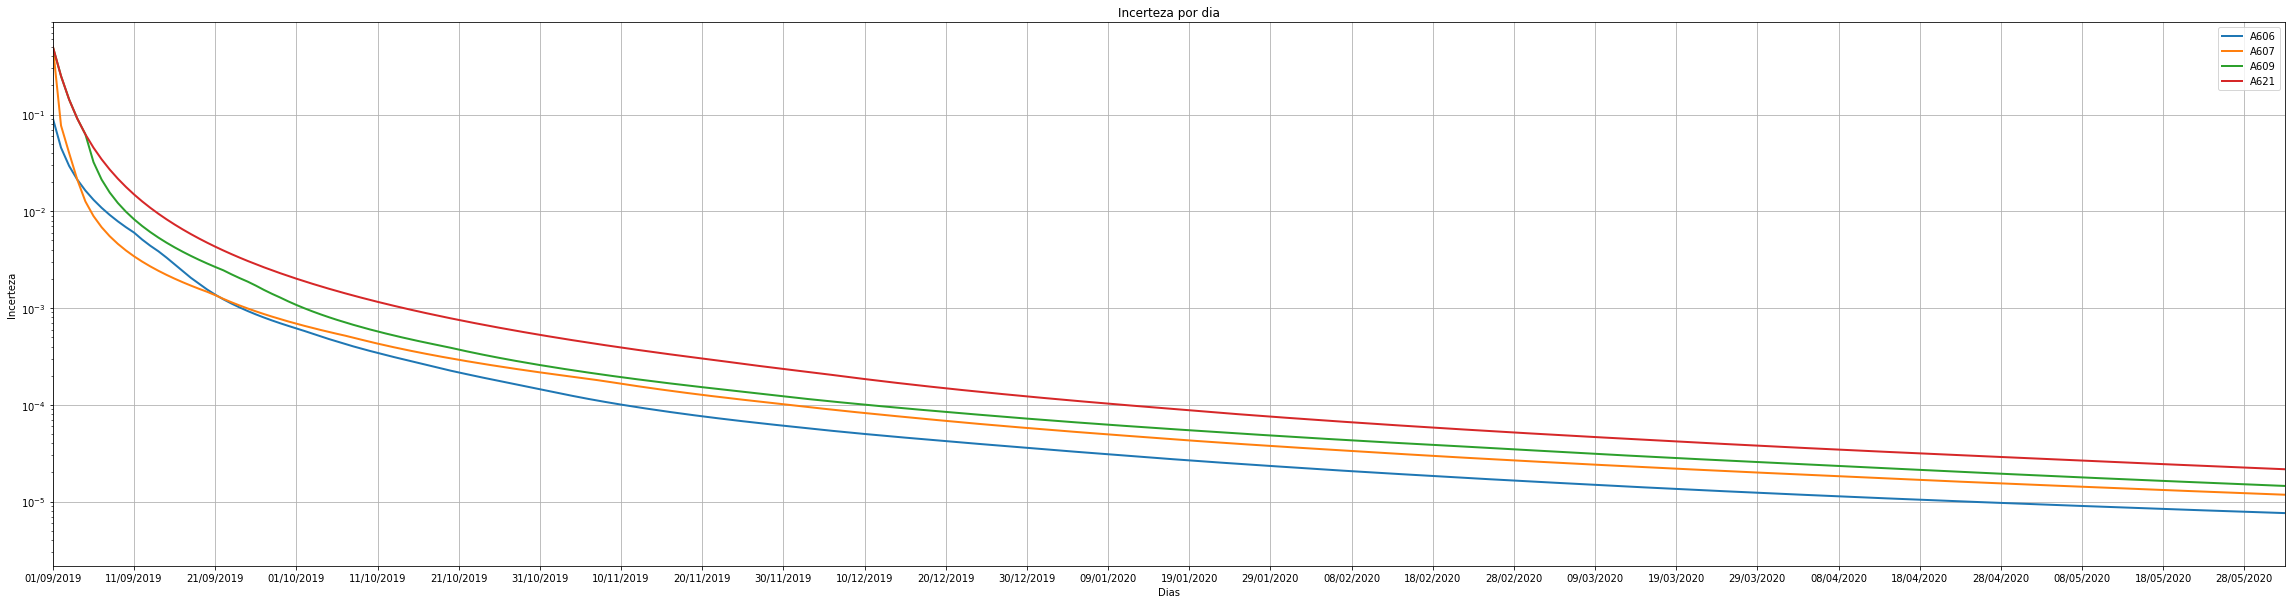

In [32]:
df = pd.read_csv("./dados_csv/incerteza_1.csv", names=labels_without_a618)
x = tuple(
    (first_day + timedelta(days=i)).strftime("%d/%m/%Y")
    for i in range(len(df["A606"]))
)
_, ax = plt.subplots(figsize=(40,10))

for label in labels_without_a618:
    plt.plot(x, df[label], label=label, linewidth=2)
    
#for date in frentes_frias:
#    idx = date - first_day
#    idx = idx.days
#    #print(idx)
#    plt.plot([idx, idx], [-1, 2], '--', color="lightskyblue", linewidth=3, alpha=.5, zorder=-10)

plt.yscale("log")

ax.set_xlabel("Dias")
ax.set_ylabel("Incerteza")
ax.set_title("Incerteza por dia")
ax.legend()
ax.grid(True)

#ax.set_ylim(2*1e-6, 1)

ax.set_xlim(0, 275)
ax.set_xticks(np.arange(0, 275, 10))

plt.savefig("dados_csv/exp2_incerteza_1.pdf")

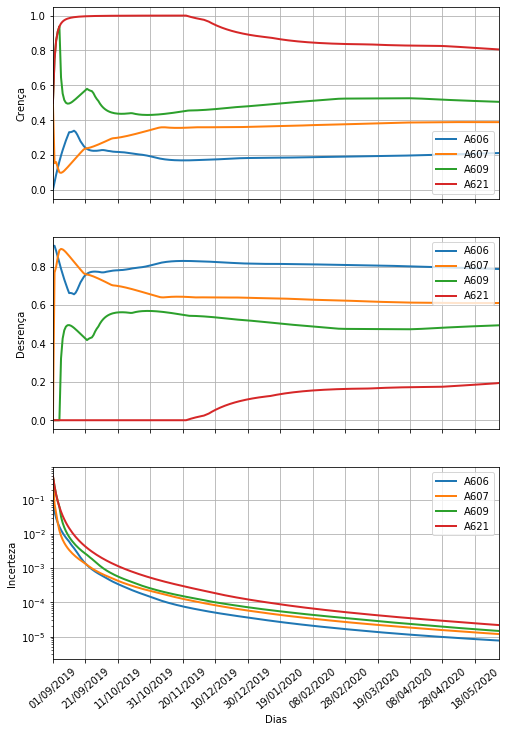

In [33]:
df_c = pd.read_csv("./dados_csv/crenca_1.csv", names=labels_without_a618)
df_d = pd.read_csv("./dados_csv/descrenca_1.csv", names=labels_without_a618)
df_u = pd.read_csv("./dados_csv/incerteza_1.csv", names=labels_without_a618)

_, ax = plt.subplots(3, 1, figsize=(8,12))

for label in labels_without_a618:
    ax[0].plot(x, df_c[label], label=label, linewidth=2)
    
    ax[1].plot(x, df_d[label], label=label, linewidth=2)
    
    ax[2].plot(x, df_u[label], label=label, linewidth=2)
    plt.xticks(rotation=40)
    plt.yscale("log")

ax[2].set_xlabel("Dias")

ax[0].set_ylabel("Crença")
ax[1].set_ylabel("Desrença")
ax[2].set_ylabel("Incerteza")

ax[0].legend(loc="lower right")
ax[1].legend(loc="upper right")
ax[2].legend(loc="upper right")

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

ax[0].set_xlim(0, 275)
ax[1].set_xlim(0, 275)
ax[2].set_xlim(0, 275)

ax[0].set_xticks(np.arange(0, 275, 20))
ax[0].xaxis.set_ticklabels([])
ax[1].set_xticks(np.arange(0, 275, 20))
ax[1].xaxis.set_ticklabels([])
ax[2].set_xticks(np.arange(0, 275, 20))


plt.savefig("dados_csv/exp2_opiniao_1.pdf")
#plt.show()

## Contagem de frentes frias

In [4]:
frentes_frias_set = set(frentes_frias)

df = pd.read_csv(
    "./dados_csv/frentes_frias_2.csv", names=["max_temp", "min_temp", "eh_frente_fria"]
)

dia_atual = first_day
verdadeiro_positivo = 0
verdadeiro_negativo = 0
falsos_positivos = 0
falso_negativo = 0
for eh_frente_fria in df["eh_frente_fria"][tamanho_janela:275]:
    if eh_frente_fria:
        if (
            dia_atual in frentes_frias_set
            or (dia_atual + timedelta(days=1) in frentes_frias_set)
            or (dia_atual + timedelta(days=2) in frentes_frias_set)
            or (dia_atual + timedelta(days=3) in frentes_frias_set)
            or (dia_atual + timedelta(days=4) in frentes_frias_set)
        ):
            verdadeiro_positivo += 1
        else:
            falsos_positivos += 1
    else:
        if dia_atual in frentes_frias_set:
            falso_negativo += 1
        else:
            verdadeiro_negativo += 1
    dia_atual += timedelta(days=1)

print(f"Verdadeiro positivos: {verdadeiro_positivo}")
print(f"Verdadeiro negativo: {verdadeiro_negativo}")
print(f"Falsos positivos: {falsos_positivos}")
print(f"Falsos negativos: {falso_negativo}")
print(
    f"Eficiência: {(verdadeiro_positivo / (falso_negativo + verdadeiro_positivo)) * 100}%"
)
print(
    f"Alarme falso: {(falsos_positivos / (verdadeiro_negativo + falsos_positivos)) * 100}%"
)


Verdadeiro positivos: 46
Verdadeiro negativo: 158
Falsos positivos: 22
Falsos negativos: 39
Eficiência: 54.11764705882353%
Alarme falso: 12.222222222222221%
